In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import json
import re
from dfpvizpy.dfpvizpy import dfpSave
import dexplot as dxp
import itertools as it

%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
sns.set(style="ticks", context='talk')
sns.set_palette('colorblind')

In [24]:
# reading in the data to a dataframe
df = pd.read_csv('DFP_WTHH_release.csv', index_col=0)
# this is the .json file with all of the questions and coding of the variables
with open('dfp_survey_questions.json', 'r') as fp:
    polling_info = json.load(fp)

Fixing some of the column data

In [25]:
# there are two values that need to be moved into the "employ" column
df.loc[2939]['employ'] = 6
df.loc[3110]['employ'] = 9
df.drop(columns='job', inplace=True)
df.drop(columns='weight_DFP', inplace=True)
df.fillna('?', inplace=True)

In [26]:
# these are columns which are the string 'other' responses
others = ['race_t', 'senvote18_t', 'senvote18_undecided_t', 'specsenvote18_t', 'specsenvote18_undecided_t',
          'housevote18_t', 'housevote18_undecided_t', 'govvote18_t', 'govvote18_undecided_t', 'NONVOTE_WHY_t',
          'pp18_polactions_txt', 'pid3_t', 'presvote16post_t', 'e14_presvote12_t', 'religpew_t']

agree_order = ['Strongly agree', 'Somewhat agree',
            'Neither agree nor disagree', 'Somewhat disagree',
            'Strongly disagree', 'Don\'t know']

age_order = ['18-29', '30-39', '40-49', '50-64', '65+']

net_dict = {'Strongly agree': 'Positive', 'Somewhat agree': 'Positive',
            'Neither agree nor disagree': 'Neutral', 'Somewhat disagree': 'Negative',
            'Strongly disagree': 'Negative'}

In [5]:
# # saving counts to a text file
# with open('polling_counts.txt', 'w') as f:
#     for column in df.columns:
#         if column in df.columns and column in polling_info.keys() and column not in others:
#             f.write(column + ' | ' + polling_info[column]["question"] + '\n\n')
#             f.write("*-" * 40 + '\n\n')
#             f.write(df[column].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info[column]).value_counts().to_string())
#             f.write('\n\n\n')

In [27]:
data_cols = []
unknown_cols = []
for column in df.columns:
    if column in df.columns and column in polling_info.keys() and column not in others:
        df[column.title()] = df[column].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info[column])
        data_cols.append((column.title(), column))
    else:
        unknown_cols.append((column.title(), column))

In [125]:
# df['Flag'] = df["FLAG"].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['FLAG'])
# df['Age'] = df["age5"].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['age5'])
# df['Gender'] = df['gender'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['gender'])
# df['Party'] = df['ideo5'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['ideo5'])
# df['Medicare'] = df['M4A'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['M4A'])
# df['College'] = df['FREECOLL'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['FREECOLL'])
# df['Abolish ICE'] = df['ICE'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['ICE'])
# df['Wealth'] = df['WEALTH'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['WEALTH'])
# df['Welfare'] = df['WELTEST'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['WELTEST'])
# df['Appreciate'] = df['APPRECIATE'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['APPRECIATE'])
# df['Remarks'] = df['REMARKS'].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info['REMARKS'])
# df['Superior'] = df['SOCIALDOMINANCE_SUPERIOR'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['SOCIALDOMINANCE_SUPERIOR'])
# df['Deport'] = df['DEPORT'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['DEPORT'])
# df['Speak'] = df['SPEAK'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['SPEAK'])

In [65]:
for col, dict_col in data_cols:
    s = sns.catplot(x='Age5', kind='count', hue=col, col='Gender', data=df, col_wrap=2, height=6, 
                    aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
    # s.ax.set_ylabel('Number of Respondents')
    # s.ax.set_xlabel('Age')
    # s.ax.set_title(polling_info['FLAG']['question'])
    s.axes[1].legend(frameon=False)
    s.axes[0].set_title('Female')
    s.axes[1].set_title('Male')
    # s.fig.tight_layout()
    s.fig.suptitle(polling_info[dict_col]['question'].title())
    s.fig.subplots_adjust(top=0.8)
    dfpSave(f'age_and_{col}.png', s.axes)
#     plt.show()

/Users/CSmith/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


In [68]:
# s = sns.catplot(x='Age', kind='count', hue='Medicare', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# # s.ax.set_ylabel('Number of Respondents')
# # s.ax.set_xlabel('Age')
# # s.ax.set_title(polling_info['FLAG']['question'])
# s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
# s.axes[0].set_title('Female')
# s.axes[1].set_title('Male')
# # s.fig.tight_layout()
# s.fig.suptitle(polling_info['M4A']['question'].title())
# s.fig.subplots_adjust(top=0.8)
# dfpSave('age_and_the_medicare.png', s.axes)
# plt.show()

# s = sns.catplot(x='Age', kind='count', hue='College', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# # s.ax.set_ylabel('Number of Respondents')
# # s.ax.set_xlabel('Age')
# # s.ax.set_title(polling_info['FREECOLL']['question'])
# s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
# s.axes[0].set_title('Female')
# s.axes[1].set_title('Male')
# # s.fig.tight_layout()
# col_title = 'Would You Support Or Oppose A Law That Would Raise Taxes On Income In Excess Of $200,000 \n Per Year By 5 Percent In Order To Cover College Tuition For All Students, \n While Capping The Rise In Tuition At The Rate Of Inflation For All Colleges Accepting Such Funding?'
# s.fig.suptitle(col_title)
# s.fig.subplots_adjust(top=.75)
# # dfpSave('age_and_the_free_college.png', s.axes)
# plt.show()

# s = sns.catplot(x='Age', kind='count', hue='Abolish ICE', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# # s.ax.set_ylabel('Number of Respondents')
# # s.ax.set_xlabel('Age')
# # s.ax.set_title(polling_info['ICE']['question'])
# s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
# s.axes[0].set_title('Female')
# s.axes[1].set_title('Male')
# # s.fig.tight_layout()
# s.fig.suptitle(polling_info['ICE']['question'].title())
# s.fig.subplots_adjust(top=0.8)
# # dfpSave('age_and_the_ICE.png', s.axes)
# plt.show()

# s = sns.catplot(x='Age', kind='count', hue='Wealth', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# # s.ax.set_ylabel('Number of Respondents')
# # s.ax.set_xlabel('Age')
# # s.ax.set_title(polling_info['WEALTH']['question'])
# s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
# s.axes[0].set_title('Female')
# s.axes[1].set_title('Male')
# # s.fig.tight_layout()
# s.fig.suptitle(polling_info['WEALTH']['question'].title())
# s.fig.subplots_adjust(top=0.8)
# # dfpSave('age_and_the_wealth.png', s.axes)
# plt.show()

# s = sns.catplot(x='Age', kind='count', hue='Welfare', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# # s.ax.set_ylabel('Number of Respondents')
# # s.ax.set_xlabel('Age')
# # s.ax.set_title(polling_info['WELTEST']['question'])
# s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
# s.axes[0].set_title('Female')
# s.axes[1].set_title('Male')
# # s.fig.tight_layout()
# s.fig.suptitle(polling_info['WELTEST']['question'].title())
# s.fig.subplots_adjust(top=0.8)
# # dfpSave('age_and_the_welfare_drug_test.png', s.axes)
# plt.show()

# s = sns.catplot(x='Age', kind='count', hue='Appreciate', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# # s.ax.set_ylabel('Number of Respondents')
# # s.ax.set_xlabel('Age')
# # s.ax.set_title(polling_info['APPRECIATE']['question'])
# s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
# s.axes[0].set_title('Female')
# s.axes[1].set_title('Male')
# # s.fig.tight_layout()
# s.fig.suptitle(polling_info['APPRECIATE']['question'].title())
# s.fig.subplots_adjust(top=0.8)
# # dfpSave('age_and_appreciating_women.png', s.axes)
# plt.show()

# s = sns.catplot(x='Age', kind='count', hue='Remarks', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# # s.ax.set_ylabel('Number of Respondents')
# # s.ax.set_xlabel('Age')
# # s.ax.set_title(polling_info['APPRECIATE']['question'])
# s.axes[1].legend(list(polling_info['REMARKS'].values())[:-1], frameon=False, loc=2)
# s.axes[0].set_title('Female')
# s.axes[1].set_title('Male')
# # s.fig.tight_layout()
# s.fig.suptitle(polling_info['REMARKS']['question'].title())
# s.fig.subplots_adjust(top=0.8)
# # dfpSave('age_and_sexist_remarks.png', s.axes)
# plt.show()

# s = sns.catplot(x='Age', kind='count', hue='Superior', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# # s.ax.set_ylabel('Number of Respondents')
# # s.ax.set_xlabel('Age')
# # s.ax.set_title(polling_info['APPRECIATE']['question'])
# s.axes[1].legend(list(polling_info['SOCIALDOMINANCE_SUPERIOR'].values())[:-1], frameon=False, loc=2)
# s.axes[0].set_title('Female')
# s.axes[1].set_title('Male')
# # s.fig.tight_layout()
# s.fig.suptitle(polling_info['SOCIALDOMINANCE_SUPERIOR']['question'].title())
# s.fig.subplots_adjust(top=0.8)
# # dfpSave('age_and_superior_dominance.png', s.axes)
# plt.show()

# s = sns.catplot(x='Age', kind='count', hue='Deport', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# # s.ax.set_ylabel('Number of Respondents')
# # s.ax.set_xlabel('Age')
# # s.ax.set_title(polling_info['DEPORT']['question'])
# s.axes[1].legend(list(polling_info['DEPORT'].values())[:-1], frameon=False, loc=2)
# s.axes[0].set_title('Female')
# s.axes[1].set_title('Male')
# # s.fig.tight_layout()
# s.fig.suptitle(polling_info['DEPORT']['question'].title())
# s.fig.subplots_adjust(top=0.8)
# # dfpSave('age_and_deportation.png', s.axes)
# plt.show()

# s = sns.catplot(x='Age', kind='count', hue='Speak', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# # s.ax.set_ylabel('Number of Respondents')
# # s.ax.set_xlabel('Age')
# # s.ax.set_title(polling_info['DEPORT']['question'])
# s.axes[1].legend(list(polling_info['SPEAK'].values())[:-1], frameon=False, loc=2)
# s.axes[0].set_title('Female')
# s.axes[1].set_title('Male')
# # s.fig.tight_layout()
# s.fig.suptitle(polling_info['SPEAK']['question'].title())
# s.fig.subplots_adjust(top=0.8)
# # dfpSave('age_and_deportation.png', s.axes)
# plt.show()

In [31]:
def atoi(text):
    return int(text) if text.isdigit() else text


def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    '''
    return [atoi(c) for c in re.split('(\d+)', text)]

In [42]:
abc = df.state.unique()
abc = [str(x) for x in abc]
abc = ['26',
 '39',
 '19',
 '37',
 '56',
 '6',
 '47',
 '13',
 '12',
 '30',
 '46',
 '55',
 '17',
 '4',
 '31',
 '35',
 '27',
 '34',
 '38',
 '23',
 '51',
 '50',
 '49',
 '44',
 '8',
 '48',
 '16',
 '5',
 '22',
 '42',
 '54',
 '1',
 '24',
 '29',
 '25',
 '36',
 '18',
 '53',
 '33',
 '20',
 '41',
 '28',
 '21',
 '40',
 '45',
 '10',
 '32',
 '15',
 '9',
 '2',
 '11']

In [43]:
abc.sort(key=int)

In [44]:
abc

['1',
 '2',
 '4',
 '5',
 '6',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '53',
 '54',
 '55',
 '56']

In [47]:
for x in range(57):
    if f'{x}' not in abc:
        print(x)

0
3
7
14
43
52


In [234]:
def freq_table(x, hue=None, col=None):
    '''
    
    '''
    tables = []
    x_ind = x[x == '?'].index
    
    x.drop(x_ind, inplace=True)
    if hue is not None:
        hue.drop(x_ind, inplace=True)
    if col is not None:
        col.drop(x_ind, inplace=True)
    
    df = pd.get_dummies(x)
    df['Hue'] = hue
    df['Col'] = col
    
    drp_index = df[(df.Hue == '?') | (df.Col == '?')].index
    df.drop(drp_index, inplace=True)
    
    for col in df.Col.unique():
        df_col = df[df.Col == col]
        grouped = df_col.groupby(by=hue).sum()
        grouped['Total'] = grouped.sum(axis=1)
        num = pd.DataFrame([grouped.sum(axis=0).values], index=['Total'], 
                           columns=new.sum(axis=0).index)

        hue_vals = df['Hue'].unique()
    
        scaled = grouped.loc[hue_vals[0]]/num * 100
        scaled.index = [hue_vals[0]]
        for idx in hue_vals[1:]:
            scl = grouped.loc[idx]/num * 100
            scl.index = [idx]
            scaled = pd.concat([scaled, scl], axis=0)
        
        scaled.index.name = f'{col}: {hue.name}'
        # here we want to make sure that the normalized variable does indeed sum to 100%
        verify = pd.DataFrame([scaled.sum(axis=0).values])
        pd.testing.assert_frame_equal(verify, pd.DataFrame([100] * len(verify.columns)).T, 
                                      check_dtype=False)

        tables.append((np.round(scaled, decimals=2), len(df_col)))
    
    return tables

In [235]:
tbls = freq_table(df.Age5, hue=df.Remarks, col=df.Gender)

In [236]:
tbls[0][0]

,18-29,30-39,40-49,50-64,65+,Total
Female: Remarks,,,,,,
Somewhat agree,15.18,20.69,20.59,19.94,20.65,20.03
Neither agree nor disagree,14.29,19.70,19.75,17.45,14.86,17.00
Strongly disagree,42.86,37.44,34.45,31.46,30.07,32.86
Somewhat disagree,20.54,11.33,16.39,21.03,24.64,20.38
Strongly agree,4.46,6.40,5.88,8.72,7.79,7.50
Don't know,2.68,4.43,2.94,1.40,1.99,2.23


In [254]:
scaled = tbls[0][0]
scaled = scaled.drop('Total', axis=1)

In [257]:
te = pd.DataFrame([(x, hue, vals) for (hue, x), vals in zip(it.product(scaled.index, 
                                                                       scaled.columns), 
                                                            scaled.values.flatten())])
te.columns = ['Age', 'Remarks', 'Percentage']

te.Remarks

0                 Somewhat agree
1                 Somewhat agree
2                 Somewhat agree
3                 Somewhat agree
4                 Somewhat agree
5     Neither agree nor disagree
6     Neither agree nor disagree
7     Neither agree nor disagree
8     Neither agree nor disagree
9     Neither agree nor disagree
10             Strongly disagree
11             Strongly disagree
12             Strongly disagree
13             Strongly disagree
14             Strongly disagree
15             Somewhat disagree
16             Somewhat disagree
17             Somewhat disagree
18             Somewhat disagree
19             Somewhat disagree
20                Strongly agree
21                Strongly agree
22                Strongly agree
23                Strongly agree
24                Strongly agree
25                    Don't know
26                    Don't know
27                    Don't know
28                    Don't know
29                    Don't know
Name: Rema

Text(0.5, 0, '')

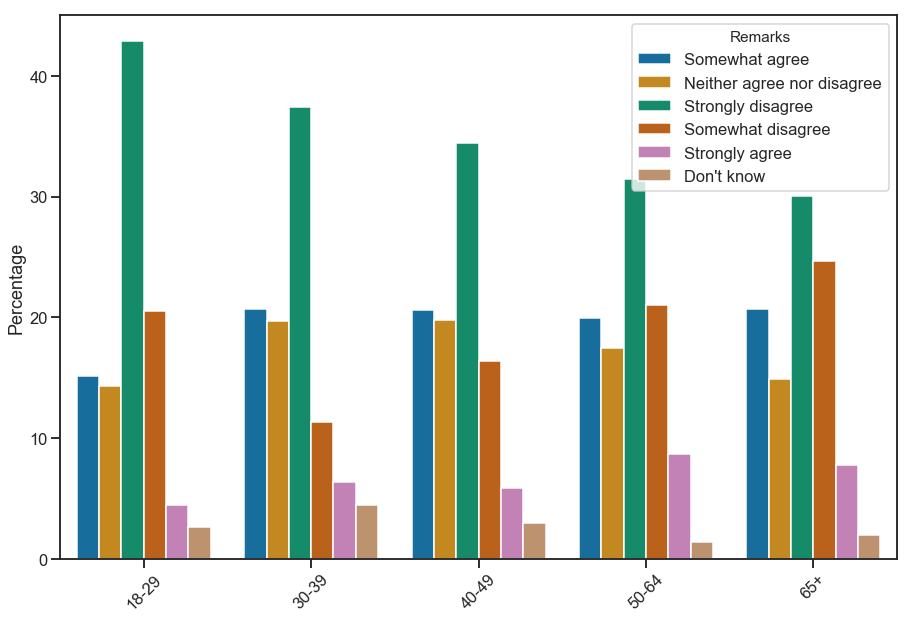

In [258]:
s = sns.barplot(te.Age, y=te.Percentage, hue=te.Remarks, data=te, order=age_order)
s.figure.set_figheight(10)
s.figure.set_figwidth(15)
s.axes.tick_params(axis='x', rotation=45)
s.axes.set_xlabel('')

In [259]:
te.replace(net_dict, inplace=True)
pos = te.groupby(['Age', 'Remarks'])['Percentage'].sum()
display(pos)

Age    Remarks   
18-29  Don't know     2.68
       Negative      63.40
       Neutral       14.29
       Positive      19.64
30-39  Don't know     4.43
       Negative      48.77
       Neutral       19.70
       Positive      27.09
40-49  Don't know     2.94
       Negative      50.84
       Neutral       19.75
       Positive      26.47
50-64  Don't know     1.40
       Negative      52.49
       Neutral       17.45
       Positive      28.66
65+    Don't know     1.99
       Negative      54.71
       Neutral       14.86
       Positive      28.44
Name: Percentage, dtype: float64

Text(0.5, 0, '')

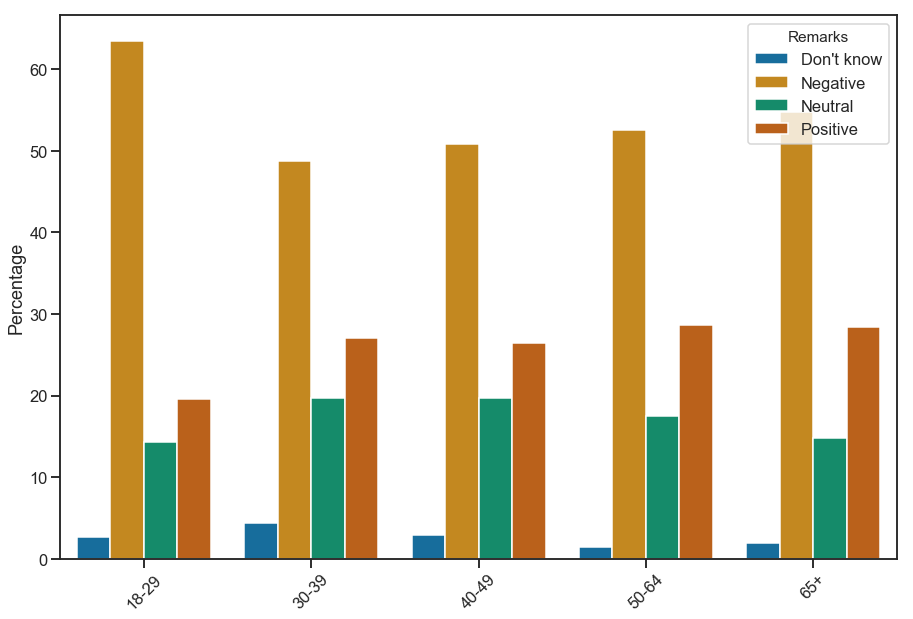

In [260]:
ndf = pos.reset_index()
s = sns.barplot(x='Age', y='Percentage', hue='Remarks', data=ndf)
s.figure.set_figheight(10)
s.figure.set_figwidth(15)
s.axes.tick_params(axis='x', rotation=45)
s.axes.set_xlabel('')

In [264]:
ndf
li = []
for age in ndf.Age.unique():
    sm = ndf[ndf.Age == age]
#     li.append([age, 
    li.append([age, sm[sm.Remarks == 'Positive']['Percentage'].values[0] - sm[sm.Remarks == 'Negative']['Percentage'].values[0]])

In [265]:
dfc = pd.DataFrame(li, columns=['Age', 'Net Positivity'])
dfc

,Age,Net Positivity
0,18-29,-43.76
1,30-39,-21.68
2,40-49,-24.37
3,50-64,-23.83
4,65+,-26.27


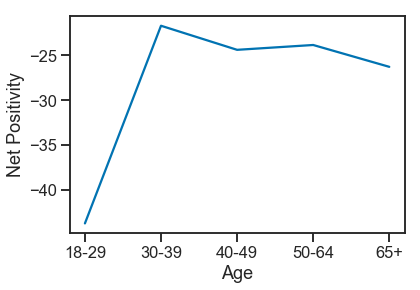

In [266]:
sns.lineplot(x='Age', y='Net Positivity', data=dfc)

In [14]:
import plotly.plotly as py
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go

# Make plotly work with Jupyter notebook
init_notebook_mode(connected=True)

data = dict(type = 'choropleth',
           colorscale='YIOrRd',
           locations = ['MI', 'IL', 'CA'],
           locationmode = 'USA-states',
           z = ['2.5', '1.6', '-2.9'],
           text = ['dum', 'dune', 'asd'],
           colorbar = {'title': 'My cool chart'},
           marker = dict(line = dict(color='rgb(255,2555,255)', width=2))
           )

In [15]:
layout = dict(title='Fancy Fancy Fancy',
             geo = dict(scope='usa', showlakes=True, lakecolor='rgb(85,173,240)'))

In [17]:
# fig = dict( data=data, layout=layout )
# iplot( fig, filename='d3-cloropleth-map')

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot(fig, filename='d3-cloropleth-map')

In [23]:
df['code']

0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     FL
9     GA
10    HI
11    ID
12    IL
13    IN
14    IA
15    KS
16    KY
17    LA
18    ME
19    MD
20    MA
21    MI
22    MN
23    MS
24    MO
25    MT
26    NE
27    NV
28    NH
29    NJ
30    NM
31    NY
32    NC
33    ND
34    OH
35    OK
36    OR
37    PA
38    RI
39    SC
40    SD
41    TN
42    TX
43    UT
44    VT
45    VA
46    WA
47    WV
48    WI
49    WY
Name: code, dtype: object

In [7]:
print(polling_info['FT_Whites']['question'])

dft = df[['FT_Whites', 'race']]
dft.race = dft['race'].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info['race'])
dft = dft[dft.FT_Whites != '?']
dft.FT_Whites = dft["FT_Whites"].astype(float)
dfg = dft.groupby(['race']).median()
sort_order = dfg.sort_values(by='FT_Whites', ascending=False).index.tolist()

x_dat = df["race"].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info['race'])
f, ax = plt.subplots(figsize=(13, 8))
idx = df[df.FT_Blacks != '?']
df_new = idx[idx.FT_Whites != '?']
ax = sns.boxplot(y=x_dat, x=df_new["FT_Whites"].astype(float), order=sort_order)
ax.set_ylabel('')
ax.set_title('Feelings Toward White People')
ax.set_xlabel('')
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])
dfpSave('feelings_towards_white_people_by_race.png', [ax])
plt.show()

Whites Rate your feeling toward this group from zero (very cold or negative) to 100 (very warm or positive).


In [44]:
table = pd.pivot_table(df, index=['Age', 'Party'], columns=['Gender'], aggfunc=np.sum)
display(table)

CONSENT        EMOTIONS_1        EMOTIONS_10         \
Gender                   Female   Male     Female   Male      Female   Male   
Age   Party                                                                   
18-29 Conservative         11.0    7.0       22.0   12.0        20.0   11.0   
      Liberal              31.0   11.0       54.0   18.0        60.0   22.0   
      Moderate             24.0    9.0       45.0   15.0        45.0   16.0   
      Not sure              5.0    NaN       10.0    NaN        10.0    NaN   
      Very conservative    10.0    8.0       20.0   15.0        18.0   14.0   
      Very liberal         33.0   18.0       55.0   29.0        63.0   34.0   
30-39 Conservative         40.0   11.0       78.0   22.0        76.0   19.0   
      Liberal              44.0   18.0       81.0   34.0        80.0   33.0   
      Moderate             47.0   24.0       86.0   46.0        89.0   41.0   
      Not sure             18.0    2.0       36.0    4.0        34.0    4.0   
      Very conservative    19.0    7.0       38.0   14.0        37.0   12.0   
      Very liberal         36.0   28.0       58.0   44.0        69.0   53.0   
40-49 Conservative         43.0   21.0       79.0   41.0        78.0   37.0   
      Liberal              48.0   25.0       77.0   39.0        94.0   45.0   
      Moderate             59.0   31.0      101.0   54.0       115.0   59.0   
      Not sure             14.0    1.0       27.0    2.0        27.0    2.0   
      Very conservative    25.0   17.0       47.0   34.0        47.0   32.0   
      Very liberal         52.0   22.0       85.0   32.0        95.0   39.0   
50-64 Conservative        129.0  116.0      234.0  207.0       224.0  206.0   
      Liberal             131.0   55.0      210.0   87.0       244.0  106.0   
      Moderate            174.0  125.0      300.0  200.0       320.0  240.0   
      Not sure             28.0   10.0       52.0   18.0        53.0   18.0   
      Very conservative   101.0   77.0      188.0  137.0       168.0  133.0   
      Very liberal         82.0   66.0      122.0  100.0       151.0  127.0   
65+   Conservative        124.0  278.0      225.0  480.0       217.0  498.0   
      Liberal             128.0  107.0      198.0  154.0       246.0  206.0   
      Moderate            124.0  143.0      217.0  240.0       227.0  266.0   
      Not sure              3.0    6.0        6.0   10.0         6.0   10.0   
      Very conservative    88.0  140.0      159.0  236.0       150.0  241.0   
      Very liberal         85.0   76.0      127.0  114.0       161.0  146.0   

                        EMOTIONS_11        EMOTIONS_12         ...    \
Gender                       Female   Male      Female   Male  ...     
Age   Party                                                    ...     
18-29 Conservative             21.0   13.0        21.0   14.0  ...     
      Liberal                  62.0   22.0        59.0   22.0  ...     
      Moderate                 48.0   17.0        45.0   18.0  ...     
      Not sure                  9.0    NaN        10.0    NaN  ...     
      Very conservative        20.0   15.0        20.0   16.0  ...     
      Very liberal             63.0   36.0        64.0   36.0  ...     
30-39 Conservative             78.0   22.0        79.0   22.0  ...     
      Liberal                  87.0   36.0        87.0   36.0  ...     
      Moderate                 93.0   47.0        92.0   48.0  ...     
      Not sure                 34.0    4.0        35.0    4.0  ...     
      Very conservative        37.0   14.0        37.0   13.0  ...     
      Very liberal             69.0   53.0        71.0   56.0  ...     
40-49 Conservative             83.0   40.0        86.0   41.0  ...     
      Liberal                  94.0   50.0        96.0   50.0  ...     
      Moderate                115.0   59.0       116.0   61.0  ...     
      Not sure                 26.0    2.0        27.0    2.0  ...     
      Very conservative        48.0   34.0      

In [47]:
for x in table:
    print(x)

('CONSENT', 'Female')
('CONSENT', 'Male')
('EMOTIONS_1', 'Female')
('EMOTIONS_1', 'Male')
('EMOTIONS_10', 'Female')
('EMOTIONS_10', 'Male')
('EMOTIONS_11', 'Female')
('EMOTIONS_11', 'Male')
('EMOTIONS_12', 'Female')
('EMOTIONS_12', 'Male')
('EMOTIONS_13', 'Female')
('EMOTIONS_13', 'Male')
('EMOTIONS_14', 'Female')
('EMOTIONS_14', 'Male')
('EMOTIONS_15', 'Female')
('EMOTIONS_15', 'Male')
('EMOTIONS_16', 'Female')
('EMOTIONS_16', 'Male')
('EMOTIONS_17', 'Female')
('EMOTIONS_17', 'Male')
('EMOTIONS_2', 'Female')
('EMOTIONS_2', 'Male')
('EMOTIONS_3', 'Female')
('EMOTIONS_3', 'Male')
('EMOTIONS_4', 'Female')
('EMOTIONS_4', 'Male')
('EMOTIONS_5', 'Female')
('EMOTIONS_5', 'Male')
('EMOTIONS_6', 'Female')
('EMOTIONS_6', 'Male')
('EMOTIONS_7', 'Female')
('EMOTIONS_7', 'Male')
('EMOTIONS_8', 'Female')
('EMOTIONS_8', 'Male')
('EMOTIONS_9', 'Female')
('EMOTIONS_9', 'Male')
('SOURCES_1', 'Female')
('SOURCES_1', 'Male')
('SOURCES_10', 'Female')
('SOURCES_10', 'Male')
('SOURCES_11', 'Female')
('SOURC

In [315]:
df.Age.head(5)

rowid
1      65+
2      65+
3      65+
4      65+
5    50-64
Name: Age, dtype: object

In [316]:
for name in np.sort(df.columns):
    print(df[name].head(5))

rowid
1    4
2    5
3    5
4    2
5    5
Name: APPRECIATE, dtype: object
rowid
1    3
2    5
3    1
4    5
5    1
Name: AVR, dtype: object
rowid
1               Strongly oppose
2               Strongly oppose
3               Strongly oppose
4               Strongly oppose
5    Neither support nor oppose
Name: Abolish ICE, dtype: object
rowid
1      65+
2      65+
3      65+
4      65+
5    50-64
Name: Age, dtype: object
rowid
1    Somewhat disagree
2    Strongly disagree
3    Strongly disagree
4       Somewhat agree
5    Strongly disagree
Name: Appreciate, dtype: object
rowid
1    3
2    2
3    2
4    5
5    2
Name: BAIL_item, dtype: object
rowid
1    5
2    5
3    1
4    4
5    1
Name: BOND, dtype: object
rowid
1    1
2    1
3    5
4    1
5    5
Name: BORDER, dtype: object
rowid
1    1
2    1
3    1
4    1
5    1
Name: CONSENT, dtype: int64
rowid
1    1
2    1
3    5
4    1
5    5
Name: CUSTOMS, dtype: object
rowid
1     Strongly oppose
2     Strongly oppose
3    Strongly support
4   

In [112]:
list(polling_info['FLAG'].values())

['Slavery and White Supremacy',
 'Southern Heritage and Culture',
 "Don't know",
 'Which of the following is closer to your view regarding the Confederate flag?']

In [114]:
polling_info['FLAG']['question']

'Which of the following is closer to your view regarding the Confederate flag?'

In [128]:
df['Gender'].value_counts()

Female    1756
Male      1459
Name: Gender, dtype: int64

'Whites Rate your feeling toward this group from zero (very cold or negative) to 100 (very warm or positive).'